In [1]:
from obspy.core import Stream, read
import numpy as np
from pytensor.compile.ops import as_op
import pytensor
import pytensor.tensor as pt
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path
import pymc as pm
import arviz as az

In [2]:
# What exactly are the colunns here? Amplitude of waves at a specific time?
# My equivalent = peak strain at a specific time

# Build the target function, misfit to this is what is being minimized
@as_op(itypes=[pt.dvector,pt.dscalar,pt.dscalar,pt.dscalar,pt.dscalar,pt.dscalar], otypes=[pt.dvector])
def two_straight_lines(x,m1,m2,xinter,x0,y0):
    '''
    input x coordiantes are in x
    slopes are m1 and m2
    intercept of left hand line is b1 
    intersection of two lines is at xinter
    
    Note that y intercept of second straight line is dependent on b1 and xinter
      and defined entirely by them (so that the lines touch).
    '''
    
    # Output vector
    y_out = np.ones(len(x))
    
    # Before building the first straight line, calculate the intercept
    b1 = y0 - m1*x0
    
    # Build first straight line segment
    y_out = m1*x + b1
    
    # Find points that are after the intersection and make the second segment
    i = np.where(x>xinter)[0]
    
    # Define second y intercept
    b2 = m1*xinter + b1 - m2*xinter
    
    # Make second straight line
    y_out[i] = m2*x[i] + b2

    return y_out

# Build the target function, misfit to this is what is being minimized
def non_pytensor_two_straight_lines(x,m1,m2,xinter,x0,y0):
    '''
    input x coordiantes are in x
    slopes are m1 and m2
    intercept of left hand line is b1 
    intersection of two lines is at xinter
    
    Note that y intercept of second straight line is dependent on b1 and xinter
      and defined entirely by them (so that the lines touch).
    '''
    
    # Output vector
    yout = np.ones(len(x))
    
    # Before building the first straight line, calculate the intercept
    b1 = y0 - m1*x0
    
    # Build first straight line segment
    yout = m1*x + b1
    
    # Find points that are after the intersection and make the second segment
    i = np.where(x>xinter)[0]
    
    # Define second y intercept
    b2 = m1*xinter + b1 - m2*xinter
    
    # Make second straight line
    yout[i] = m2*x[i] + b2

    return yout

In [3]:
path = '/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/'
snr_array = pd.read_csv(path + '3comp_stations_hypdists_snrs_newdetrend.csv')
snr_array

,Station_name,latitude,longitude,azimuth(S1),azimuth(S2),azimuth(S3),azimuth(S4),hyp_dist_km,rms_snr
0,KST1,33.5201,135.8363,310,40,85,175,792.746765,7.466982
1,HGM1,33.8675,135.7318,337,67,112,202,773.809644,7.974318
2,ICU1,33.9001,136.1379,141,231,276,6,743.491829,9.266279
3,ANO1,34.7870,136.4019,38,128,173,263,661.251185,2.967841
4,SSK1,33.3896,133.3229,355,85,130,220,981.546244,9.261528
5,UWA1,33.3859,132.4823,222,312,357,87,1045.683453,5.523282
6,MUR1,33.2856,134.1563,147,237,282,12,927.200827,5.369215
7,MYM1,34.1123,136.1815,237,327,12,102,724.694237,3.109215


Processing KST1
20.0


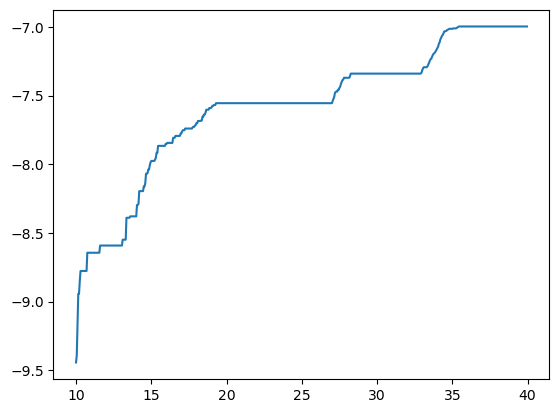

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 114 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


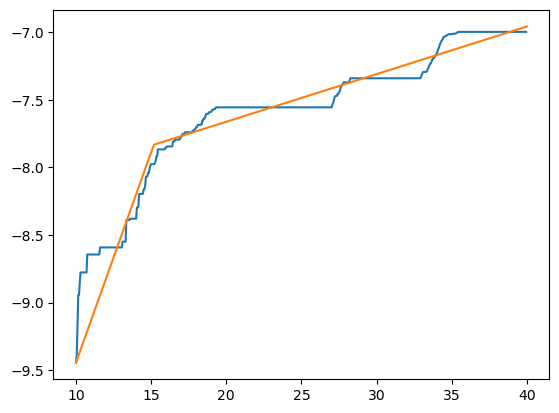

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.311  0.005   0.302    0.321      0.001    0.000      60.0   
m2       0.035  0.001   0.034    0.037      0.000    0.000     100.0   
xinter  15.179  0.117  14.960   15.391      0.015    0.011      58.0   
sigma    0.134  0.004   0.127    0.141      0.000    0.000   12507.0   

        ess_tail  r_hat  
m1         159.0   1.07  
m2         160.0   1.04  
xinter     155.0   1.07  
sigma    12779.0   1.00  
Processing HGM1
20.0


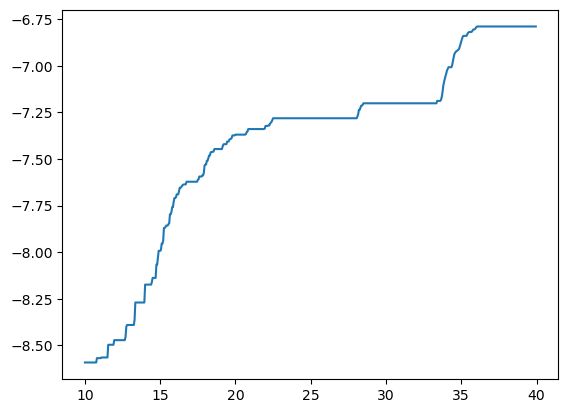

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 104 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


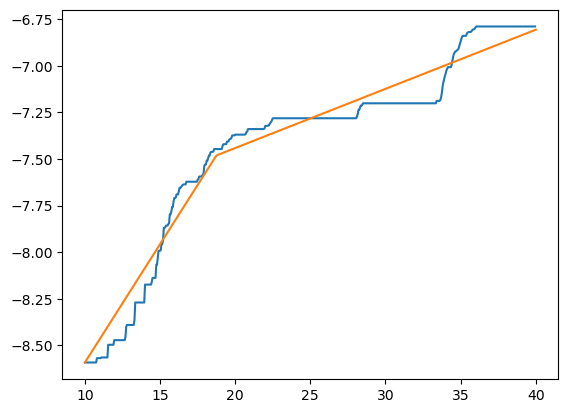

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.127  0.001   0.125    0.129      0.000    0.000      47.0   
m2       0.032  0.001   0.030    0.033      0.000    0.000     142.0   
xinter  18.749  0.135  18.517   19.009      0.013    0.009     110.0   
sigma    0.095  0.003   0.090    0.100      0.000    0.000   12607.0   

        ess_tail  r_hat  
m1         174.0   1.08  
m2         128.0   1.05  
xinter     510.0   1.02  
sigma    12897.0   1.00  
Processing ICU1
20.0


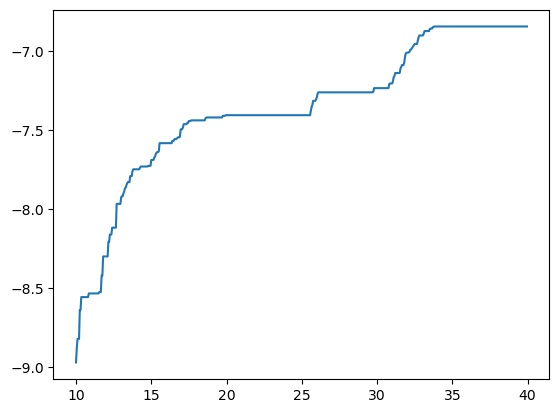

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 111 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


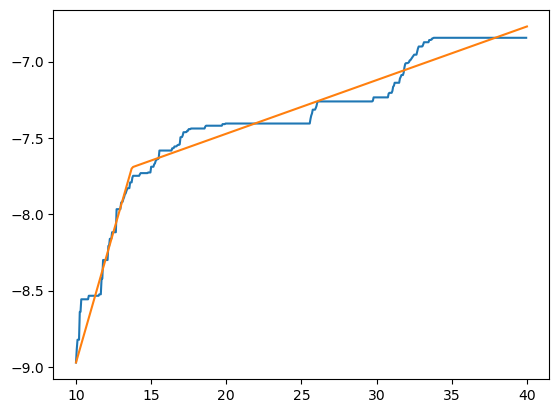

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.343  0.005   0.334    0.353      0.001    0.001      45.0   
m2       0.035  0.000   0.034    0.036      0.000    0.000      74.0   
xinter  13.723  0.066  13.578   13.830      0.010    0.007      41.0   
sigma    0.081  0.002   0.077    0.086      0.000    0.000   12785.0   

        ess_tail  r_hat  
m1          63.0   1.06  
m2          86.0   1.10  
xinter      57.0   1.08  
sigma    13412.0   1.00  
Processing ANO1
20.0


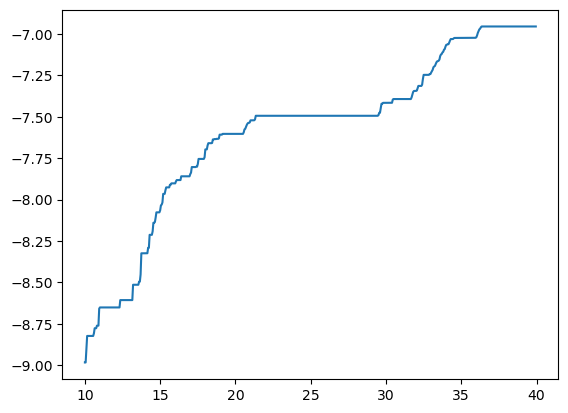

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 106 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


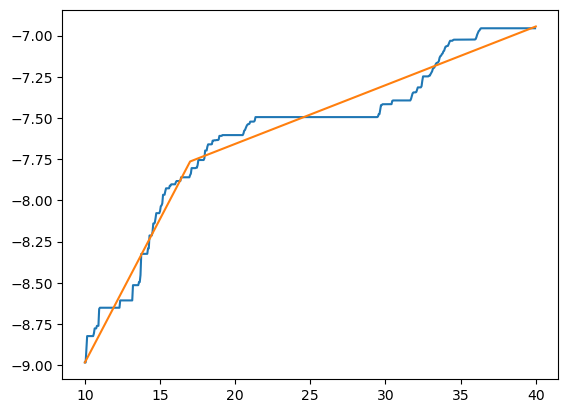

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.174  0.002   0.171    0.178      0.000    0.000      39.0   
m2       0.036  0.001   0.034    0.037      0.000    0.000     126.0   
xinter  16.992  0.128  16.745   17.221      0.022    0.016      32.0   
sigma    0.085  0.002   0.080    0.090      0.000    0.000   12134.0   

        ess_tail  r_hat  
m1         143.0   1.09  
m2         192.0   1.02  
xinter     153.0   1.09  
sigma    12395.0   1.00  
Processing SSK1
20.0


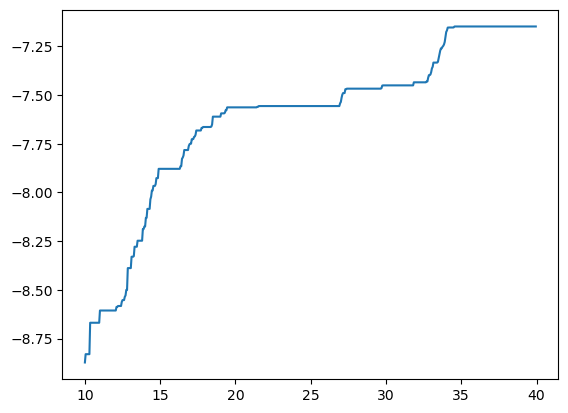

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 107 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


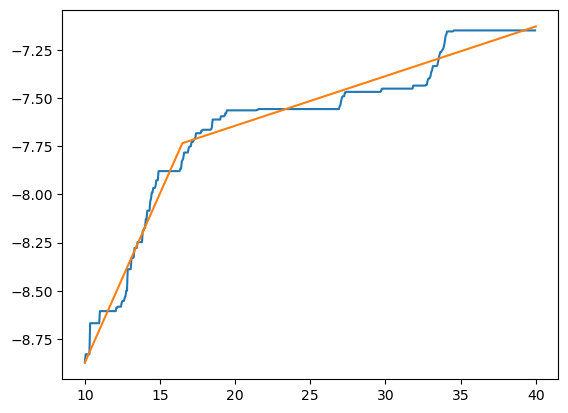

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.176  0.002   0.173    0.179      0.000    0.000      25.0   
m2       0.026  0.000   0.025    0.027      0.000    0.000      53.0   
xinter  16.481  0.088  16.323   16.650      0.012    0.009      53.0   
sigma    0.067  0.002   0.063    0.070      0.000    0.000   12671.0   

        ess_tail  r_hat  
m1          65.0   1.12  
m2         111.0   1.06  
xinter      94.0   1.07  
sigma    13757.0   1.00  
Processing UWA1
20.0


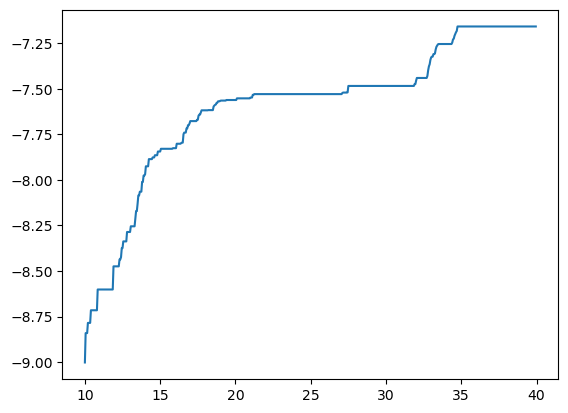

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 105 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


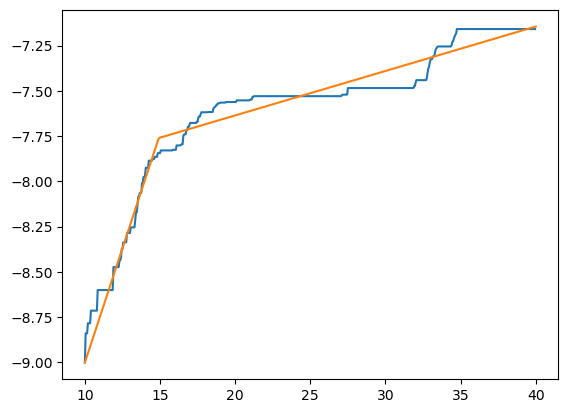

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.252  0.003   0.247    0.258      0.001    0.001      14.0   
m2       0.025  0.000   0.024    0.025      0.000    0.000      50.0   
xinter  14.913  0.075  14.769   15.053      0.021    0.015      14.0   
sigma    0.070  0.002   0.067    0.074      0.000    0.000   11758.0   

        ess_tail  r_hat  
m1          83.0   1.22  
m2         129.0   1.08  
xinter      42.0   1.23  
sigma    12848.0   1.00  
Processing MUR1
20.0


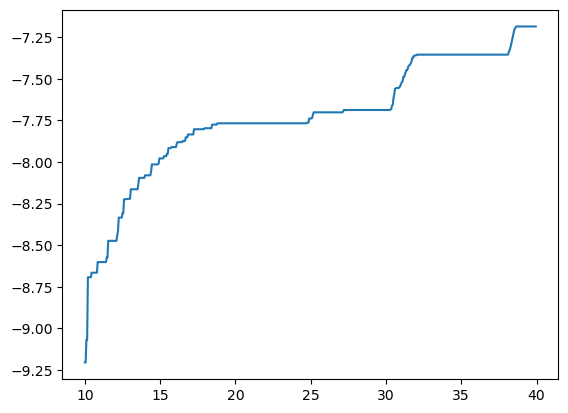

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 106 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


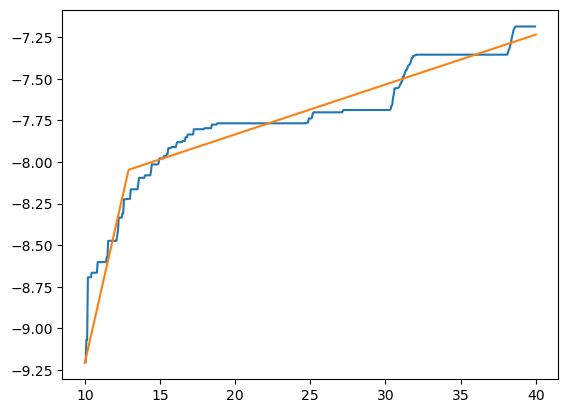

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.398  0.010   0.379    0.416      0.002    0.002      21.0   
m2       0.030  0.001   0.029    0.031      0.000    0.000      82.0   
xinter  12.909  0.086  12.764   13.081      0.019    0.014      21.0   
sigma    0.092  0.003   0.087    0.097      0.000    0.000   13013.0   

        ess_tail  r_hat  
m1          57.0   1.15  
m2         162.0   1.06  
xinter      43.0   1.15  
sigma    13832.0   1.00  
Processing MYM1
20.0


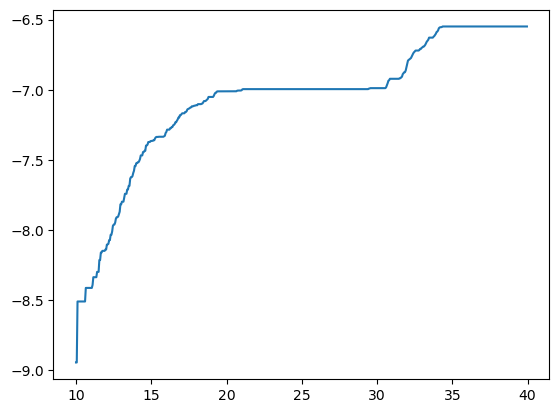

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 109 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


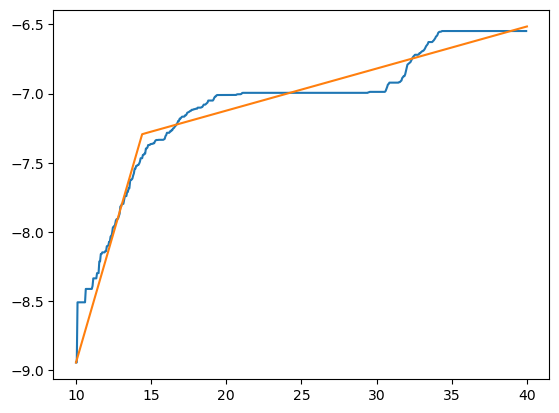

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.375  0.005   0.365    0.384      0.001    0.001      38.0   
m2       0.030  0.001   0.029    0.031      0.000    0.000      49.0   
xinter  14.401  0.076  14.255   14.535      0.013    0.009      36.0   
sigma    0.102  0.003   0.096    0.107      0.000    0.000   12627.0   

        ess_tail  r_hat  
m1         142.0   1.08  
m2         107.0   1.07  
xinter     109.0   1.08  
sigma    13318.0   1.00  


In [4]:
events_list = []
mags_list = []
stas_list = []
hypdist_list = []
xhighs_list = []
m1s_list = []
m2s_list = []
xinters_list = []
sigmas_list = []
trans_time_list = []

for idx in range(len(snr_array)):

    sta = snr_array['Station_name'][idx]
    # sta = 'ANO1'

    # Figure out the bounds for the MCMC based on the event and hypocentral distance (rainbow plots)
    xlow = 10
    xhigh = 40 # change for different comp windows 
    evt_id = 'tohoku'
    mag = '9.1'
    hypdist = snr_array['hyp_dist_km'][idx]
    # hypdist = 661
    int_hypdist = int(hypdist)

    try:
        pst = read(path + '3comp_peak_post_p_newdetrend/' + sta + '.mseed')
    except:
        print('Skipping ' + sta + ', no data')
        continue

    print('Processing ' + str(sta))

    times = pst[0].times()
    data = pst[0].data
    log10_data = np.log10(data)
    samp_rate = pst[0].stats.sampling_rate
    print(samp_rate)

    vec_start = int(xlow*samp_rate)
    vec_end = int(xhigh*samp_rate)

    # Split into x and y vectors
    xobserved = times[vec_start:vec_end]
    yobserved = log10_data[vec_start:vec_end]
    x0 = xobserved[0]
    y0 = yobserved[0]
    
    plt.plot(xobserved, yobserved)
    plt.show()

    # in order to pass the x variable into the target function it needs to be 
    # converted to a Theano "shared" variable
    pt_xobserved = pytensor.shared(xobserved)
    pt_x0 = pytensor.shared(x0)
    pt_y0 = pytensor.shared(y0)

    # MCMC run parameters, these are good numbers for a "production" run. If you are
    # fooling arund these can be lower to iterate faster
    Nburn = 5000 # burn in samples that get discarded
    Nmcmc = 15000 # bump to at least 5-10k
    Nchains = 4
    Ncores = 1

    # Bounds for the prior distributions
    m1_low = -1; m1_high = 1
    m2_low = -1; m2_high = 1
    xinter_low = 10 ; xinter_high = 25 # location of the line slope change. 25 for med/long, 11 for short

    # Define the Bayesian model
    with pm.Model()as model:

        # Use normal distributions as priors
        # m1 = pm.Normal('m1', mu = 0.5, sigma = 1)
        # m2 = pm.Normal('m2', mu = -0.1, sigma = 5)
        m1 = pm.Uniform('m1', lower = m1_low, upper = m1_high)
        m2 = pm.Uniform('m2', lower = m2_low, upper = m2_high)
        xinter = pm.Uniform('xinter', lower = xinter_low, upper = xinter_high)
        sigma = pm.HalfCauchy('sigma', beta = 10, initval = 1)

        # This is the model
        likelihood = pm.Normal('y', mu = two_straight_lines(pt_xobserved,m1,m2,xinter,pt_x0,pt_y0),
                                observed = yobserved, sigma = sigma)

        # NUTS sampler (default) is gradient based and won't work, use metropolis
        step = pm.Metropolis(scaling = 0.1)

        # This runs the mcmc sampler
        mcmc = pm.sample(Nmcmc, tune = Nburn, chains = Nchains, cores = Ncores, step = step)

    # Done, now is post-processing to get the data out of the sampler

    posterior = az.extract(mcmc)

    # Unwrap coeficients - WRITE LINES TO SAVE THE ARRAYS!!!
    m1_array = posterior.m1.values
    m1 = np.mean(m1_array)
    # print('m1 mean: ' + str(round(m1,2)))

    m2_array = posterior.m2.values
    m2 = np.mean(m2_array)
    # print('m2 mean: ' + str(round(m2,2)))

    xinter_array = posterior.xinter.values
    xinter = np.mean(xinter_array)
    # print('xinter Mean: ' + str(round(xinter,2)))

    sigma_array = posterior.sigma.values
    sigma = np.mean(sigma_array)

    # Lines!
    b1 = y0 - m1*x0
    b2 = m1*xinter + b1 - m2*xinter

    # Make plot to check stuff
    xpredicted = np.arange(xobserved.min(), xobserved.max()+0.1, 0.1)
    ypredicted = m1*xpredicted + b1
    i = np.where(xpredicted > xinter)[0]
    ypredicted[i] = m2*xpredicted[i] + b2
    plt.plot(xobserved, yobserved)
    plt.plot(xpredicted, ypredicted)
    plt.show()

    # Get one-sigma region (need to obtain a ton of forward models and get stats)
    N = len(posterior.m1.values)

    yfit = np.zeros((len(xpredicted), N))
    for k in range(N):
        yfit[:,k] = non_pytensor_two_straight_lines(xpredicted,m1_array[k],m2_array[k],xinter_array[k],x0,y0)
    mu = yfit.mean(1)
    sig = yfit.std(1) * 1.95 #for 95% confidence
    mu_plus = mu + sig
    mu_minus = mu - sig

    # Least squares
    mls, bls = np.polyfit(xobserved, yobserved, 1)

    # Find the transition point in ypredicted
    diff = np.round(np.diff(ypredicted), decimals = 5)
    # print(diff)
    first_slope = diff[0]
    second_slope = diff[-1]
    try:
        trans_idx = np.where((diff != first_slope) & (diff != second_slope))[0][0] + 1
    except:
        trans_idx = np.where(diff == first_slope)[0][0] + 1

    # Get the transition point
    mcmc_trans_x = xpredicted[trans_idx] # Number
    mcmc_trans_y = ypredicted[trans_idx]

    # Append things
    events_list.append(evt_id)
    mags_list.append(mag)
    stas_list.append(sta)
    hypdist_list.append(int_hypdist)
    xhighs_list.append(xhigh)
    m1s_list.append(m1)
    m2s_list.append(m2)
    xinters_list.append(xinter)
    sigmas_list.append(sigma)
    trans_time_list.append(mcmc_trans_x)

    # Create folder for the event
    array_save_dir = path + '3comp_MED40s_newdetrend_mcmc_arrays/' + sta + '/'
    if os.path.isdir(array_save_dir):
        pass
    else:
        os.makedirs(array_save_dir)

    np.save(array_save_dir + 'xobserved.npy', xobserved)
    np.save(array_save_dir + 'yobserved.npy', yobserved)
    np.save(array_save_dir + 'xpredicted.npy', xpredicted)
    np.save(array_save_dir + 'ypredicted.npy', ypredicted)
    np.save(array_save_dir + 'forward_mus.npy', mu)
    np.save(array_save_dir + 'foward_sigs.npy', sig)

    summary = az.summary(mcmc, fmt = 'wide')
    print(summary)
    summary.to_csv(array_save_dir + 'mcmc_summary.csv', index = False)

    # Folder for figures
    fig_save_dir = path + '3comp_MED40s_newdetrend_mcmc_plots/'
    if os.path.isdir(fig_save_dir):
        pass
    else:
        os.makedirs(fig_save_dir)

    az.plot_trace(mcmc)
    # plt.show()
    plt.savefig(fig_save_dir + sta + '_stats_plots.png', format = 'PNG')
    plt.close()

    # Plot all solutions
    fig = plt.figure(dpi = 100)
    ax = fig.add_subplot(111)
    ax.set_title(str(sta))

    ax.plot(xobserved, yobserved, color = 'blue', label = 'Observed (log peak strain)')
    ax.plot(xpredicted, ypredicted, color = 'red', label = 'Predicted (MCMC)')
    # ax.plot(xpredicted, mu, color = 'green', linestyle = '--', label = 'yfit')
    # ax.plot(xpredicted, xpredicted * mls + bls, color = 'orange', label = 'np.polyfit least squares')
    ax.scatter(xpredicted[trans_idx], ypredicted[trans_idx], marker = 'o', color = 'black', label = 'Transition at ' + str(round(xpredicted[trans_idx],2)) + ' sec')
    # ax.scatter(closest_trans_x, closest_trans_y, marker = 'o', color = 'green', label = 'Adjusted transition at ' + str(round(closest_trans_x,2)) + ' sec')
    # ax2 = ax.twinx()
    # ax2.plot(xobserved, pythags_arr, color = 'violet')
    # ax2.axhline(closest_trans_x, color = 'violet', linestyle = '--')
    ax.fill_between(xpredicted, mu_plus, mu_minus, color = 'gray', alpha = 0.2, label = '95% confidence') # 95% confidence interval
    ax.set_xlabel('Time (s) - p-wave at 10s')
    ax.set_ylabel('log10 of peak strain')
    # ax.set_xlim(10,13)
    ax.legend()

    # plt.show()

    plt.savefig(fig_save_dir + sta + '.png', format = 'PNG')
    plt.close()

In [5]:
mcmc_array = np.column_stack((np.array(events_list), np.array(mags_list), np.array(stas_list), np.array(hypdist_list),
                             np.array(xhighs_list), np.array(m1s_list), np.array(m2s_list), np.array(xinters_list),
                             np.array(sigmas_list), np.round(np.array(trans_time_list),2)))

np.save(path + '3comp_MED40s_newdetrend_mcmc_arrays/mcmc_colstack_array.npy', mcmc_array)

In [6]:
mcmc_array.shape

(8, 10)

In [7]:
# mcmc_array = np.column_stack((np.array(events_list), np.array(mags_list), np.array(stas_list), np.array(hypdist_list),
#                              np.array(xhighs_list), np.array(m1s_list), np.array(m2s_list), np.array(xinters_list),
#                              np.array(sigmas_list), np.array(trans_time_list)))

pd_mcmc = pd.DataFrame(mcmc_array, columns = ['eq_id', 'mag', 'sta', 'hypdist', 'xhigh', 'm1', 'm2', 'xinter', 'sigma', 'trans_time'])
pd_mcmc.to_csv(path + '3comp_MED40s_newdetrend_mcmc_arrays/mcmc_results_summary.csv', index = False)

In [8]:
# Figure out the "good" and "bad" performing waveforms using an L2 norm

mcmc_results = pd.read_csv(path + '3comp_MED40s_newdetrend_mcmc_arrays/mcmc_results_summary.csv')
mcmc_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time
0,tohoku,9.1,KST1,792,40,0.311260,0.035247,15.178538,0.133699,15.2
1,tohoku,9.1,HGM1,773,40,0.126902,0.031732,18.748517,0.095010,18.8
2,tohoku,9.1,ICU1,743,40,0.343299,0.035118,13.723173,0.081264,13.8
3,tohoku,9.1,ANO1,661,40,0.174413,0.035622,16.991932,0.085103,17.0
4,tohoku,9.1,SSK1,981,40,0.175808,0.025793,16.481493,0.066512,16.5
5,tohoku,9.1,UWA1,1045,40,0.252460,0.024581,14.913380,0.070260,15.0
6,tohoku,9.1,MUR1,927,40,0.398463,0.030000,12.908514,0.092004,13.0
7,tohoku,9.1,MYM1,724,40,0.374822,0.030397,14.401120,0.101500,14.5
